#### Laboratorio kNN 
#### Alumno: Juan Pablo Maldonado Castro
#### 10 de agosto de 2021
#### Sistemas basados en conocimiento
# K - Nearest Neighbors 

En este laboratorio vamos a utilizar la implementación del algoritmo de k vecinos más cercanos (kNN) de la biblioteca `sklearn` de Python. 


## I. Datos *fake*
Primero, vamos a usar **datos sintéticos** (i.e., datos construidos para experimentar, que no corresponden a datos reales) para explorar un ejemplo del algoritmo. 

Python (por supueeeeeesto) tiene la función `make_blobs`, que permite crear un conjunto de datos con distintas clases (centros). 

In [102]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs

La función recibe de entrada la cantidad de instancias (`n_samples`), la dimensión de los datos (`n_features`), la cantidad de clases/grupos (`centers`) y la desviación estándar en cada grupo (`cluster_std`). 

Por ejemplo, supongamos que construimos datos en $\mathbb{R}^2$ que pertenecen a 3 clases distintas. 

In [103]:
fakeData1 = make_blobs(n_samples=80,n_features=2, 
                       centers=3, cluster_std=4.)

Las variables de salida incluyen:
- una matriz X con los datos; la matriz es de tamaño n_samples x n_features
- un vector y que indica a qué grupo pertenece cada uno de las instancias generadas; es de tamaño 1 x n_samples

Opcionalmente, el algoritmo puede devolver los centros que se usaron para construir cada grupo

In [104]:
# la matriz X
fakeData1[0].shape

(80, 2)

In [105]:
# el vector con la clase/grupo de cada instancia
fakeData1[1]

array([0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0,
       2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1,
       0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 1])

Como no hemos usado make_blobs antes, vamos a graficar para ver cómo se ven los puntos. 

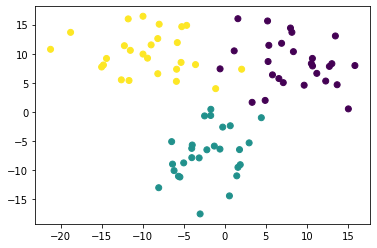

In [106]:
import matplotlib.pyplot as plt

X = fakeData1[0]

# c especifica el color de los puntos,
# uso la clase como color
plt.scatter(X[:,0], X[:,1],c=fakeData1[1]) 

### <font color='red'>Ejercicio 1: </font>

Experimenta con distintos valores (al menos tres) de `cluster_std` para ver cómo cambia la distribución de los puntos, graficando en cada caso. 

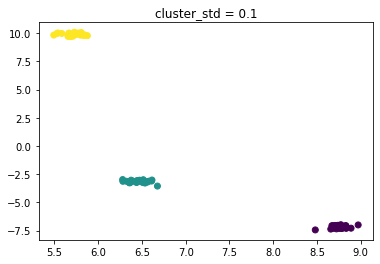

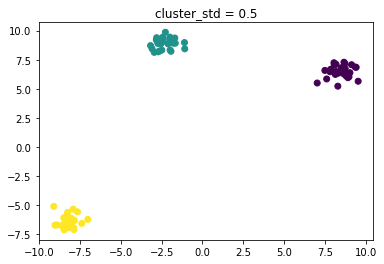

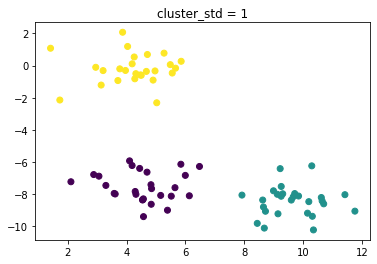

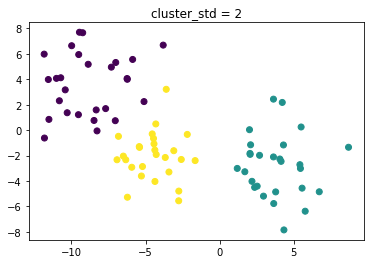

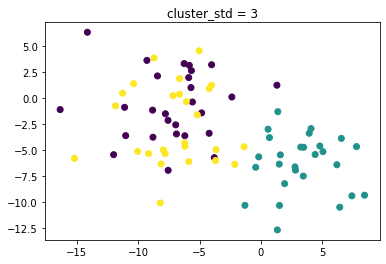

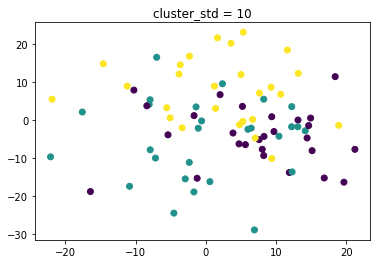

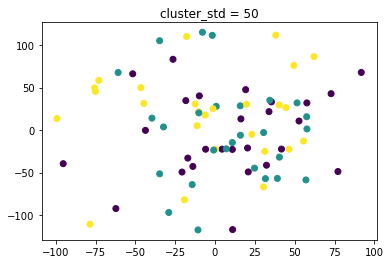

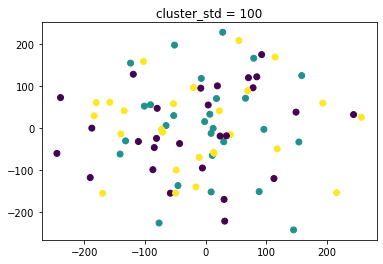

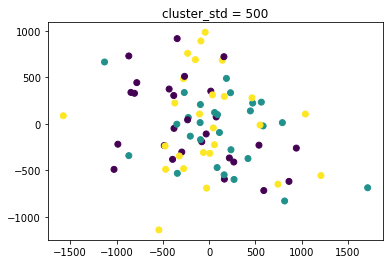

In [107]:
cluster_values = [0.1,0.5,1,2,3,10,50,100,500]



for value in cluster_values:
    fakeDataSample = make_blobs(n_samples=80,n_features=2, 
                       centers=3, cluster_std=value)
    X = fakeDataSample[0]
    plt.scatter(X[:,0], X[:,1], c = fakeDataSample[1])
    plt.title(f"cluster_std = {value}")
    plt.show()

## II. kNN con datos sintéticos

Para ilustrar el uso de kNN, vamos a crear un conjunto de 400 instancias de 2 clases distintas. Cada instancias va a estar descrita por 6 atributos y vamos a usar un dataframe para manipular los datos. 

In [108]:
datos = make_blobs(n_samples=400, n_features=6,
                   centers=2, cluster_std = 5.0)

clase = datos[1]
clase

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [109]:
DF    = pd.DataFrame(datos[0], 
                  columns=['Attr_' + str(i) for i in range(6)])
DF.head()


,Attr_0,Attr_1,Attr_2,Attr_3,Attr_4,Attr_5
0,10.859767,-5.120339,-0.179170,-2.808087,2.755100,13.859520
1,10.109609,-0.401393,6.648486,8.281201,4.470466,8.721997
2,9.826302,-1.740222,14.934359,8.525266,-7.328798,1.679970
3,8.335944,-6.740423,-6.538793,4.209681,6.111113,15.613909
4,12.160667,4.006918,9.438683,12.246850,7.657716,6.780536


### Preprocesamiento 1: Normalización

Normalizar los datos es una parte muy importante del preprocesamiento de los datos - especialmente si vamos a usar funciones de distancia! La biblioteca sklearn cuenta con diferentes funciones para hacerlo, por ejemplo `MinMaxScaler`.

   MinMax corresponde a la función que estudiamos en clase, en donde para  cada valor $x$ del atributo $A$ se utiliza la transformación
$$f(x) = \frac{x-min_A}{max_A - min_A}.$$ 

De este modo, los valores de $A$ se mapean al intervalo $[0,1]$.


In [110]:
from sklearn import preprocessing

escalador = preprocessing.MinMaxScaler() 
X_norm = escalador.fit_transform(DF)

### Preprocesamiento 2: Crear partición de datos

El siguiente paso es **dividir** nuestros datos en los conjuntos de **entrenamiento, validación y prueba**.  

Sklearn cuenta con la función `train_test_split`, que no considera al conjunto de validación. Para dividir nuestros datos en tres conjuntos, vamos a usar la función de sklearn dos veces. 

Para este ejemplo nos vamos a apegar a una división más o menos común de los datos: 70% entrenamiento, 15% validación y 15% prueba.

In [111]:
from sklearn.model_selection import train_test_split

# Primero separo el conjunto de entrenamiento
X_train, X_vt, y_train, y_vt = train_test_split(X_norm,clase,
                                               test_size=.30)


# Del 30% de datos restantes, la mitad son para validación
X_val, X_test, y_val, y_test = train_test_split(X_vt,y_vt,
                                               test_size=.50)

X_train

array([[0.62871669, 0.80342437, 0.85323513, 0.82808532, 0.51556697,
        0.58273195],
       [0.30201928, 0.63323827, 0.63119982, 0.5704291 , 0.31815285,
        0.45510589],
       [0.51044062, 0.52310543, 0.31420207, 0.20300159, 0.47837874,
        0.77484505],
       ...,
       [0.2014778 , 0.45652051, 0.58287622, 0.42042399, 0.73213574,
        0.53637849],
       [0.62243376, 0.35026514, 0.5389203 , 0.9800154 , 0.31071166,
        0.31500848],
       [0.47836148, 0.39827818, 0.70738075, 0.69086798, 0.37865832,
        0.33240246]])

***
### Determinar k

Queremos usar $k$ vecinos más cercanos para separar nuestros las dos clases que hay en nuestro conjunto. ¿Cuál será un valor de $k$ que tenga un buen desempeño para estos datos?

Para decidir vamos a clasificar varias veces, cada una con un valor distinto de $k$, evaluando el model en los datos de validación. 

Para llevar a cabo la clasificación vamos a usar la función `kNeighborsClassifier` de sklearn. 

Algunos parámetros de entrada de esta función son: 

- **n_neighbors**: la cantidad $k$ de vecinos que vamos a tomar en cuenta
- **weights**: la opción por default es que el voto de todos los vecinos valga lo mismo, pero en este parámetro podemos especificar si queremos que el peso del voto sea inversamente proporcional a la distancia 
- **p**: el parámetro de la métrica de Minkowski utilizada; es decir, si p=2 estaríamos usando la distancia euclideana
- **metric**: la opción por default es usar una métrica de Minkowski, pero aquí podríamos especificar alguna otra función - incluyendo alguna definida por nosotros. 

Puedes revisar la lista completa de parámetros en la [documentación de la función](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


En nuestro ejemplo vamos a usar la distancia euclidiana. Además, para evaluar el desempeño del clasificador vamos a usar la métrica $F_1$. Esta métrica ya viene implementada en sklearn (¡oh sorpresa!), en la función `f1_score`.

En este caso no soy muchos datos, $N=500$. Voy a explorar k entre 1 y 20, que es un valor cercano a la raíz cuadrada de $N$.  


In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


k_F1   = []
kRange = range(1,21)

for k in kRange:
    # crear el modelo con los datos de entrenamiento
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(X_train,y_train)
    
    # predecir clase de instancias en conjunto de validación
    y_pred = knn.predict(X_val)
    
    # estimar F1
    k_F1.append(f1_score(y_val, y_pred))
#print(y_val)
#print(y_pred)
list(zip(kRange,k_F1)) 

[(1, 0.896551724137931),
 (2, 0.8928571428571429),
 (3, 0.9310344827586207),
 (4, 0.912280701754386),
 (5, 0.912280701754386),
 (6, 0.8928571428571429),
 (7, 0.9310344827586207),
 (8, 0.9310344827586207),
 (9, 0.9310344827586207),
 (10, 0.9310344827586207),
 (11, 0.9310344827586207),
 (12, 0.9310344827586207),
 (13, 0.9310344827586207),
 (14, 0.9310344827586207),
 (15, 0.9310344827586207),
 (16, 0.9310344827586207),
 (17, 0.9310344827586207),
 (18, 0.9310344827586207),
 (19, 0.9310344827586207),
 (20, 0.9310344827586207)]

Para apreciar mejor los valores obtenidos, voy a graficar mis resultados. 

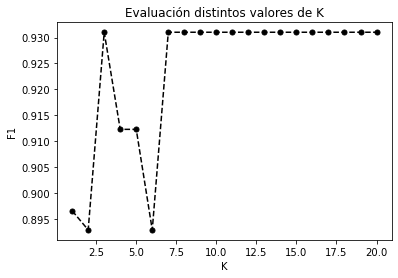

In [113]:
plt.plot(kRange,k_F1,'.--k',markersize=10)
plt.title('Evaluación distintos valores de K')
plt.xlabel('K')
plt.ylabel('F1')
plt.show()

La gráfica que yo obtuve no es exactamente igual a la tuya (hay valores generados al azar a lo largo del lab). Esta es una captura de los valores que yo obtuve: 

![Resultados de Marisol al crear este lab](misResultados1.png)

Con base en esto, yo intentaría $k=3$. Quizá probaría 2,4,5,6. Definitivamente no un valor mayor a 6. 

En general, es posible que en este ejercicio obtengas poca información de la gráfica. Los datos son sintéticos y probablemente el clasificador obtenga un *score* perfecto para muchos valores de $k$ (en esta gráfica que te muestro, claramente tuve mala suerte #historiaDeMiVida). Con datos reales es poco probable que obtengas clasificación perfecta. 

### Evaluar el modelo

Ya que terminé de hacer ajustes a mi modelo (y eso podría incluír hacer experimentos con métricas que no son de Minkowski o con kNN pesado), voy a estimar su desempeño usando los datos de prueba. 

Este paso es importante porque me da información de qué esperar del modelo cuando lo use en la vida real, con datos nuevos. Con base en este número, yo podría decidir que usar kNN simplemente no es buena idea para mi problema. 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2, p=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(f1_score(y_test, y_pred))

##  III. Implementaciones de kNN. 

Cuando hacemos ejemplos de kNN a mano no construimos un modelo con los datos de entrenamiento; si queremos clasificar una instancia $x$, obtenemos la distancia de $x$ a cada uno de los datos de entrenamiento y decidimos su clase en ese momento.  

En contraste, una implementación eficiente de kNN utiliza los datos de entrenamiento para simplificar la localización de vecinos más cercanos a una instancia. 

Es común que algunas implementaciones utilicen la idea de un **diagrama de Voronoi**. Dado un conjunto de puntos $P$ en el plano (en este caso, instancias de entrenamiento), un diagrama de Voronoi permite dividir el plano en regiones de forma tal que a cada punto $p_i$ se le asigna la región compuesta por los puntos que están más cercanos a él que a cualquier otro punto $p_j$ ($i\not= j$). 

![Ejemplo Voronoi](ejemploVoronoi.png)

Es fácil ver que construir esta fragmentación del plano permite identificar el vecino más cercano ($k=1$) de muchas instancias nuevas, sin necesidad de calcular las distancias *a todo* el conjunto de entrenamiento. Si tuviera $k>1$ puedo definir aristas de una manera análoga (aunque el dibujo se ve diferente) para simplificar la búsqueda.


Existen otras opciones para implementar kNN. Sklearn, en el paso <font color=blue> knn.fit </font> construye un árbol de búsqueda k-dimensional que permite organizar los las instancias de entrenamiento, particionando el espacio y permitiendo búsquedas muy rápidas. Puedes leer más sobre *k-d trees* haciendo una búsqueda en internet. 

# <font color="red"> Tarea </font>

1. Utiliza el conjunto de datos sobre cáncer de mama que se incluye en el archivo `breastCancer.csv`. La columna *diagnosis* contiene la clase que vamos a utilizar, y especifica si un tumor es maligno (M) o benigno (B) con base en sus dimensiones.   


2. Construye un modelo kNN apropiado para los datos. Utiliza un conjunto de validación para decidir si es mejor usar la distancia euclidiana, la distancia manhattan o la función coseno. 


3. Evalúa el desempeño de tu modelo utilizando $F_1$.

# <font color="red"> Solución Tarea </font>

Primero importamos el conjunto de datos `breastCancer.csv`

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
D = pd.read_csv('./breastCancer.csv')
D

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


El siguiente paso sería normalizar los datos, pero primero hay que reorganizar el dataframe. Esto de tal forma que tengamos en un arreglo separando la clasificación de nuestras clases en un arreglo llamado `diagnosis`, también haciendo que la columna de `id` sea la columna de índices y finalmente eliminando una columna que se pasó erróneamente al dataframe que es `Unnamed: 32`.

In [4]:
#Asignar la columna id como la columna de índices
D = pd.read_csv('./breastCancer.csv', index_col = 0)

#Guardar la columna de diagnosis en un arreglo separado
diagnosis = D['diagnosis'].values

#Tirar la columna de relleno (Unnamed: 32) y la de diagnosis del dataframe
D = D.drop(D.columns[[0,-1]], axis = 1)

D

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


Ahora que tenemos nuestros datos un poco más organizados para su evaluación, empecemos por normalizarlos:

In [5]:
escalador = preprocessing.MinMaxScaler()
tX_norm = escalador.fit_transform(D)

El siguiente paso es crear la partición de datos con: 70% entrenamiento, 15% validación y 15% prueba.

In [6]:
#X_train = entrenamiento = 70%, X_vt = validación y prueba = 30%
tX_train, tX_vt, ty_train, ty_vt = train_test_split(tX_norm,diagnosis,
                                               test_size=.30)

#X_val = validación = 15%, X_test = prueba = 15%
tX_val, tX_test, ty_val, ty_test = train_test_split(tX_vt,ty_vt,
                                               test_size=.50)


In [7]:
print("Xtrain =",tX_train,"\nYtrain =", ty_train, "\nXval =",tX_val,"\nYval =", ty_val, "\nXtest =",tX_test, "\nY_test =", ty_test)

Xtrain = [[0.4012968  0.48156916 0.41469145 ... 0.74329897 0.28543268 0.33884298]
 [0.66775522 0.57017247 0.68350494 ... 0.9975945  0.49931007 0.48117539]
 [0.51441147 0.11903957 0.48932347 ... 0.2866323  0.0429726  0.02407189]
 ...
 [0.16986133 0.3554278  0.18215742 ... 0.50343643 0.20342992 0.42607897]
 [0.52529699 0.41021305 0.50867252 ... 0.31549828 0.1584861  0.06913289]
 [0.41644186 0.44639838 0.42782116 ... 0.69896907 0.33688153 0.46018628]] 
Ytrain = ['M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'M' 'B' 'B' '

Ahora vamos a construir el modelo kNN para los datos. Lo que ocupamos es averiguar cuál valor de $k$ parece tener más éxito, además de la métrica. Esto lo probaremos con el conjunto de validación. Primero probaremos los valores de $k\in[1,20]$ y además por cada uno de ellos, probaremos las métricas de distancia: euclidiana, manhattan y coseno.

Algo que hay que notar es que acorde a la documentación de `f1_score` no hay una función de distancia coseno que podamos implementar directamente, así que la programaremos nosotros mismos. Recordemos que la similitud coseno, no es una distancia como tal, y además la función kNeighborsClassifier solo permite como parámetro de métrica algo que regrese una distancia. Lo que haremos es definir la distancia coseno como: 1 - similitudCoseno, lo cual cumple con las propiedades de distancia requeridas para la función a utilizar.

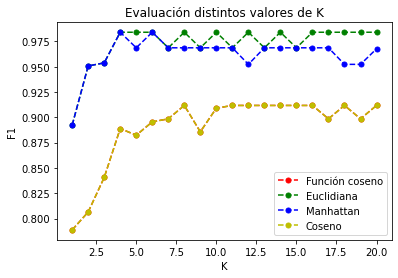

In [8]:
def cos_distance(x,y):

    xy = [x[i]*y[i] for i in range(len(x))]
    x2 = [x[i]**2 for i in range(len(x))]
    y2 = [y[i]**2 for i in range(len(y))]
    return 1- (sum(xy)/((sum(x2)**(1/2))*(sum(y2)**(1/2))))

k_F1   = []
kRange = range(1,21)


for k in kRange:
    # crear el modelo con los datos de entrenamiento
    knn = KNeighborsClassifier(n_neighbors=k, metric = cos_distance)
    knn.fit(tX_train,ty_train)
    
    # predecir clase de instancias en conjunto de validación
    ty_pred = knn.predict(tX_val)
    
    # estimar F1
    k_F1.append(f1_score(ty_val, ty_pred, pos_label="M")) #Consideramos M = 1, es decir, la clase positiva. Por lo cual la ponemos en pos_label

#print(y_val)
#print(y_pred)
#print(list(zip(kRange,k_F1)))
plt.plot(kRange,k_F1,'.--k',markersize=10, c='r', label="Función coseno")

plt.title(f'Evaluación distintos valores de K')
plt.xlabel('K')
plt.ylabel('F1')

for myMetric in ['euclidean', 'manhattan','cosine']:
    k_F1 = []
    for k in kRange:
        knn = KNeighborsClassifier(n_neighbors=k, metric = myMetric)
        knn.fit(tX_train,ty_train)

        # predecir clase de instancias en conjunto de validación
        ty_pred = knn.predict(tX_val)

        # estimar F1
        k_F1.append(f1_score(ty_val, ty_pred, pos_label="M")) #Consideramos M = 1, es decir, la clase positiva. Por lo cual la ponemos en pos_label
    
    #print(y_val)
    #print(y_pred)
    #print(list(zip(kRange,k_F1)))
    if myMetric == 'euclidean':
        plt.plot(kRange,k_F1,'.--k',markersize=10, c='g', label="Euclidiana")
    elif myMetric == 'manhattan':
        plt.plot(kRange,k_F1,'.--k',markersize=10, c='b', label="Manhattan")
    else:
        plt.plot(kRange,k_F1,'.--k',markersize=10, c='y', label="Coseno")
    
plt.legend()
plt.show()

Observando cómo se comporta con los distintos valores de $k$ podemos notar que usar la función coseno en este caso nos da resultados de menor precisión que la distancia Euclidiana y Manhattan para todo $k\in[1,20]$. Si comparamos solo la distancia Euclidiana y Manhattan podemos observar que se comportan de manera muy  similares. En este caso, para el conjunto de entrenamiento y validación que tuvimos, obtenemos resultados donde parece que la distancia Manhattan presenta precisiones mayores que la distancia Euclidiana. Entonces, lo que haremos será solo considerar la distancia Manhattan para nuestro modelo. También tenemos que escoger un valor para $k$, esto lo haremos observando por cuáles puntos de la distancia Manhattan se ve la mejor precisión. Podemos observar, que en este caso, los mejores casos se presentan en $k =5$ y $k = 4$. Vamos a elegir el más pequeño de los dos y usarlo en nuestro modelo.


En resumen nuestro modelo pra kNN contará con $k = 4$ y usará distancia Manhattan. Evaluando su desempeño con el conjunto de prueba nos queda que:

In [101]:
knn = KNeighborsClassifier(n_neighbors=4, metric="manhattan")
knn.fit(tX_train,ty_train)
ty_pred = knn.predict(tX_test)
print("Original:",ty_test)
print("Predicción:",ty_pred)
print("F_1 =", f1_score(ty_test, ty_pred, pos_label = "M"))

Original: ['M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B']
Predicción: ['M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B']
F_1 = 1.0


Finalmente obtuvimos que el desempeño del modelo kNN construido usando $F_1$ es de: $F_1 = 1.0$, es decir, una precisión del 100% con el conjunto de prueba. El hecho de que haya dado exactamente el valor de $100\%$ probablemente se debe a un poco de suerte por cómo se distribuyeron las particiones de valores de prueba, validación y entrenamiento. De todas formas, también podría decirse que para llegar a resultados con precisiones altas se necesita observar cómo varía $F_1$ dependiendo de la distancia y el valor de $k$ en el conjunto de validación. Esto puede siempre estar variando dependiendo de cómo se distribuyan los datos al partirlos. En otros casos con estos datos podría incluso pasar algo como que la distancia Euclidiana sea mejor métrica que la Manhattan en el conjunto de validación, pero que en el de prueba fuera al revés (ya habíamos observado que esas dos eran las que arrojaban resultados muy parecidos en el conjunto de validación). También podrían pasar casos similares en los valores de $k$.

En conclusión, al construir un modelo kNN es importante observar el comportamiento de $k$ y las distintas métricas de distancia disponibles. Con esto podemos llegar a ciertas conclusiones que nos permitan dar un resultado lo más preciso que podamos. Pero siempre hay que tener en consideración que va a haber ligeras variaciones en el conjunto de entrenamiento, validación y prueba que darán lugar a pequeños cambios en el valor de $F_1$ del modelo al usarlo en los dos últimos conjuntos mencionados. Como esto último es prácticamente inevitable lo mejor que se puede hacer con kNN es observar el comportamiento general del conjunto de validación bajo distintas métricas y valores, para obtener la mayor cantidad de predicciones correctas posibles en el conjunto de prueba.


### Nota adicional:
Ejecutar todo la libreta nuevamente va a causar incoherencias entre los resultados mencionados en texto y los mostrados por medio de ejecución de código. Esto se debe a que la función de partición de sklearn parte el conjunto de datos de cierta manera aleatoria. Si se ejecuta el código nuevamente, es extremadamente probable, que trabaje con un conjunto de entrenamiento, validación y prueba distintos a los que se usaron para esta actividad. De todas formas, por si acaso, se van a adjuntar unas capturas de pantalla que demuestren los resultados originales:

Datos de las particiones originales:


![Particiones1](particiones1.png)
![Particiones2](particiones2.png)

Resultados gráficos originales:


![grafOriginal](grafOriginal.png)